<a href="https://colab.research.google.com/github/jaiswi/EDA-projects/blob/main/YES_BANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **YES BANK STOCK CLOSING PRICE PREDICTION**

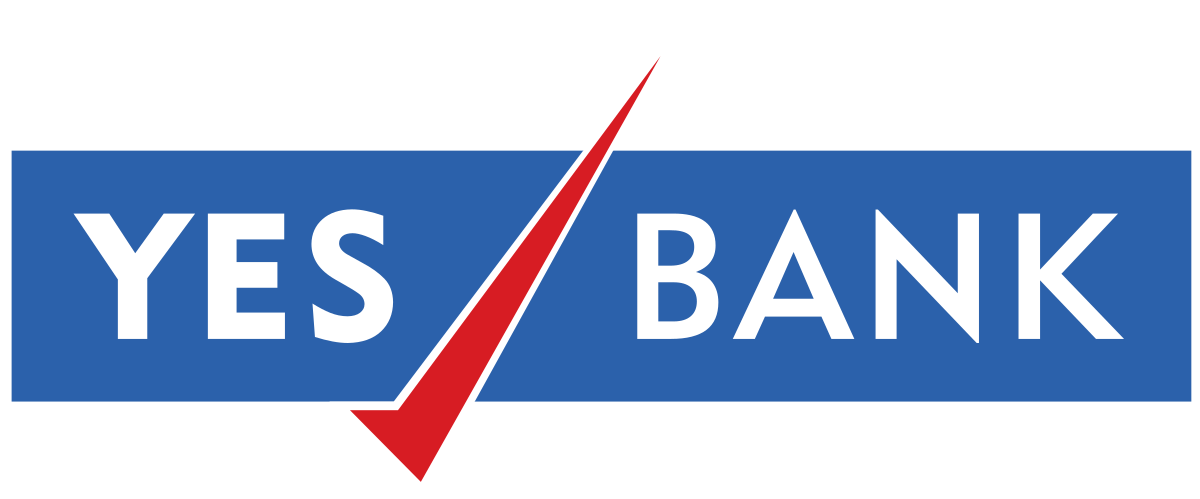

##### **Project Type**    - Regression
##### **Contribution**    - Individual
# **Name - Jaiswi**

# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.



# **GitHub Link -**

https://github.com/jaiswi

# **Objective**


**This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

## **Project Work Flow:-**



*   **Importing Necessary Libraries**
*   **Data Wrangling**
     
     **1.Gathering Data**
         -CSV and Other files
         -API's
         -Web Scrapping
         -Databases
  **2.Assembling Data**

  **3.Cleaning Data**


*   **EDA and Feature Engineering on Features**
*   **Features Transformation and selection**
*  **Remove Multicollinearity**
*   **Model implementation and pre-processing**
      1. Train, Test and Split
      2. Preprocessing using column-transformer
      3. Make best pipeline
*   **Fitting the regression models and HyperParameter Tuning**
*   **Final selection of the model**
*   **Conclusion**








        


   






# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

##**Data Wrangling**

### Dataset *Loading*

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

In [ ]:
df.tail(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.describe()

In [ ]:
df.info()

In [ ]:
df.columns

### **DATASET INFORMATION:-**

We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be *Close*, and independent variables are - *Open, High  and Low*.

* **Date:**  It denotes the month and year of the for a particular price.
* **Open:**  Open means the price at which a stock started trading that month.
* **High:**  refers to the maximum price that month.
* **Low:**   refers to the minimum price that month.
* **Close:** refers to the final trading price for that month, which we have to predict using regression

In [ ]:
#copying data to preserve orignal file
df1= df.copy()

# **EDA AND Data Pre-Processing**

BIFURCATE DEPENDENT AND INDEPENDENT VARIABLES

In [ ]:
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

**HANDLING DATE**

Instead of dropping the date, we will convert it into the proper format and use it as an index.

In [ ]:
 #converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [ ]:
#set date as index
df1.set_index('Date',inplace=True)

In [ ]:
#check if changes are being reflected
df1.head(1)

**CHECK AND HANDLE DUPLICATES**

In [ ]:
#check duplicate entries
len(df1[df1.duplicated()])

No duplicate value found

**UNIVARIATE ANALYSIS**
---
We will take a look at distribution plots of our features.

INDEPENDENT VARIABLES

In [ ]:
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df1[var])
    fig.set_title('')
    fig.set_ylabel(var)


DEPENDENT VARIABLE

In [ ]:
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna())
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=df1['Close'])
fig.set_title('')
fig.set_ylabel(var)#plots for dependent variable
plt.figure(figsize=(15,6))


DATA TRANSFORMATION

---
Since our data is skewed, we will perform some transformations during regression analysis. Let's visualize how our data will look like post transformation.


In [ ]:
#independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df1[var]))
    fig.set_title('')
    fig.set_ylabel(var)

Now our data mimics normal distribution to an extent.

**BIVARIATE ANALYSIS**

In [ ]:
#scatter plot between dependent variable with all independent variables.
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df1[col], df1['Close'], 1)
   y_hat = np.poly1d(z)(df1[col])

   plt.plot(df1[col], y_hat, "r--", lw=1)

plt.show()

**We can clearly make out that all the independent variables are linearly affecting our dependent variable.**

#**Correlation**


Now, we will see the correlation between all the features in our data set.

In [ ]:
#correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

#**MULTICOLLINEARITY**

In [ ]:
#Multicollinearity
#VIF score

def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(indep_var)

Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values.


NOTE - I tried to run an analysis  by converting high and low into day range and my error increased by 3x-4x, which further proved all data points here are necessary.

#**DATAFRAME TO STORE EVALUATION METRICS**

I will store the evaluation metrics for each regression model into this data frame to compare at the end.

In [ ]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

# **LINEAR REGRESSION**

From this point on we will run different Regression models with the same data.

---

Let's start with Linear Regression.

In [ ]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=1)

In [ ]:
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Fitting Linear Regression to the Training set
reg = LR()
reg = LR().fit(x_train, y_train)

In [ ]:
#predictions
y_pred = reg.predict(x_test)

#**EVALUATION**

In [ ]:
#defining mape
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Linear regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i+=1

##**VISUALIZATION**

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **LASSO REGRESSION**

In [ ]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

In [ ]:
lasso.score(x_train, y_train)

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
#prediction
y_pred = lasso_regressor.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Lasso regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)


i=i+1

#**VISUALIZATION**

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **RIDGE REGRESSION**

In [ ]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

In [ ]:
ridge.score(x_train, y_train)

In [ ]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
#Prediction
y_pred = ridge_regressor.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Ridge regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

#**VISUALIZATION**

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **KNN**

In [ ]:
#hyperparameter tuning
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)

In [ ]:
#fitting data
model.fit(x_train,y_train)

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='KNN regressor'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

#**VISUALIZATION**

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **XGBOOST REGRESSOR**

Since Xgboost is a black box technique and has a lot of inbuilt functions, we will put untransformed data through it.

I tried running the data with manual inputs but XGB gave the best results with no human intervention, I guess the machine is already smarter than me :p

In [ ]:
#data split
x_train, x_test,y_train, y_test = train_test_split((indep_var),(dep_var),test_size=.20,random_state=1)

In [ ]:
#fitting data
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

In [ ]:
#prediction
y_pred = xgb.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='XGBoost regressor'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

#**VISUALIZATION**

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **METRICS COMPARISION**

We will now compare performance of all the regression models-

In [ ]:
#sorting metrics
error_df.sort_values(by=['MAE'],ascending=True,inplace=True)

In [ ]:
error_df

# **Conclusion**

---
1. The target variable is highly dependent on input variables.
2. Linear Regression has given the best results with lowest MAE, MSE, RMSE and MAPE scores.
3. Ridge regression shrunk the parameters to reduce complexity and multicollinearity, but ended up affecting the evaluation metrics.
4. Lasso regression did feature selection and ended up giving up worse results than ridge which again reflects the fact that each feature is important (as previously discussed).
5. The accuracy for each model is more than 90%.
6. KNN AND XGBoost have given similar results.

## **THANK YOU!**